<a href="https://colab.research.google.com/github/MohamedS-Siena/computational_physics/blob/main/Mohamed_Shahabuddeen_09_Lab05_SHM_mass_spring_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectations for All Notebooks
* Be sure to read instructions carefully and answer all questions.
* Use formatted printing and descriptive print statements
* You must include comment strings for all functions
* ALL PLOTS NEED LABELS ON X AND Y AXES
* If more than one data set is plotted, you must include a legend.
* Plot discrete data with points rather than a line.
```python
plt.plot(x, y, 'bs')
```
or
```python
plt.scatter(x,y)
```

# Overview

### Part 1: Visualize Data and Determine Analytic Solution
* Plot data of mass oscillating on a spring
* determine the analytic solution
* check your answer with me!

### Part 2: Model Motion with the Euler Method
* Implement the Euler method
* Compare Euler solution with your analytic solution
* Plot the energy of the Euler solution vs time.

### Part 3: Model Motion with the Euler-Cromer Method
* Implement the Euler-Cromer method
* Compare Euler-Cromer solution with your analytic solution
* Plot the energy of the Euler solution vs time.


# Part 1: Visualize Data and Plot Solution for Simple Harmonic Oscillator

* We will visualize data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        |    |  |  |
| $\omega$ |    |  |  |
| $\phi$   |    |  |  |

### 0. Import modules

In the cell below, import numpy and matplotlib

In [87]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt

### 1. Transfer Data and Import Data Into Colab

(5 points)

* We will use `wget` to transfer data from github.
* We need to first install `wget` using `pip`.
* We can then read the data in and create a plot of position vs time.



In [88]:
!pip install wget
import wget

In [89]:
!wget https://raw.githubusercontent.com/rfinn/computational_physics/refs/heads/main/data/shm_mass_spring_good.csv


--2025-02-24 20:24:10--  https://raw.githubusercontent.com/rfinn/computational_physics/refs/heads/main/data/shm_mass_spring_good.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619 (7.4K) [text/plain]
Saving to: ‘shm_mass_spring_good.csv.3’

shm_mass_spring_goo 100%[===================>]   7.44K  --.-KB/s    in 0s      

2025-02-24 20:24:10 (86.4 MB/s) - ‘shm_mass_spring_good.csv.3’ saved [7619/7619]



In [90]:
# use astropy to read in your data file
from astropy.io import ascii
data = ascii.read("shm_mass_spring_good.csv",delimiter=',')

In [91]:
# print data so you can see the column names
print(data)

Time(s)    Position(m)        Velocity(m/s)      Acceleration(m/s²) 
------- ------------------ -------------------- --------------------
    0.0 0.7541000247001648  -0.3215557336807251 -0.15655027495490179
   0.05 0.7390000224113464  -0.3373613953590393  0.14201297804161353
    0.1 0.7200999855995178 -0.33523350954055786   0.7024558274834244
   0.15 0.7026000022888184 -0.27916669845581055    1.463993427194195
    0.2 0.6905999779701233 -0.18211093213823107    2.121455231566488
   0.25 0.6830000281333923 -0.05294422308603924    2.457720887513809
    0.3 0.6851000189781189  0.08227772182888456    2.372621073399061
   0.35 0.6926000118255615  0.19272204902436996    2.012962286854967
    0.4 0.7042999863624573  0.29349995983971483   1.3467592773614105
   0.45 0.7232000231742859   0.3537221087349786  0.16296279651147347
    ...                ...                  ...                  ...
   4.55 0.7423999905586243  -0.3024443321757852  -0.8412653465329787
    4.6 0.7232000231742859 -0.3208

* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [92]:
# save the time and position data
t = data["Time(s)"]
x = data["Position(m)"]
v = data["Velocity(m/s)"]
# subtract the mean of the position from the position
x = x - np.mean(x)

### 3. Visualize and Analyze The Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using matplotlib.

Text(0, 0.5, 'x (m)')

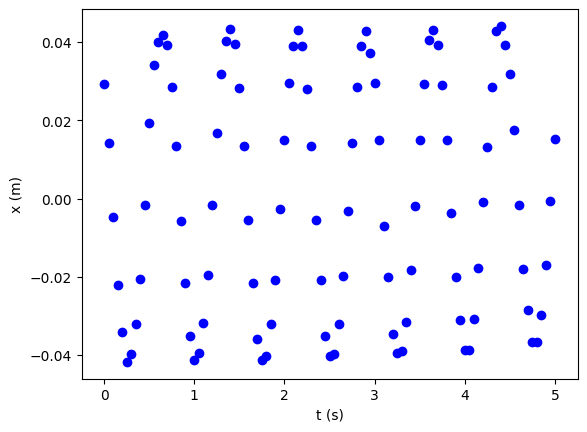

In [93]:
# code to plot your position vs time data here
plt.plot(t,x,"bo")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

#### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.



In [94]:
# values of period and amplitude from the graph

A = 0.04 # amplitude in m
# highest point minus zero
T = 0.8 # period in sec
# time difference between peaks

##### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [95]:
# calculate omega

omega = 2*np.pi/T

#### Plot the Data and the Analytic Solution

(5 points)

* Copy your code for plotting the position versus time
* Add code to overplot the analytic solution on the same figure.

* Determine the best value of $\phi$ using trial and error.


In [130]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def pos(A,omega,phi,t):
  '''
  calculates position (x)
  '''
  x = A*np.cos(omega*t-phi)
  return x


Text(0, 0.5, 'x (m)')

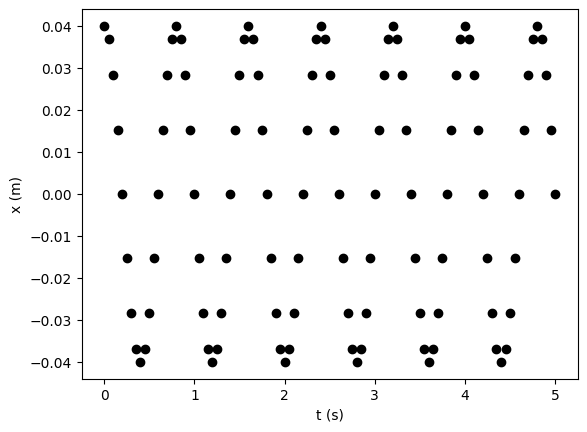

In [129]:
# enter your code to plot your data and analytic solution
# be sure to use your function
phi = 0
x = pos(A,omega,phi,t)
plt.plot(t,x,"ko")
plt.xlabel("t (s)")
plt.ylabel("x (m)")




### 4. Record the initial position and velocity

(5 points)

* Use a formatted print statement to display the initial position and velocity of the mass oscillating on a spring. Enter your values in the Table below.
* Enter the value for the angular frequency, $\omega$.
* Enter the value for the spring constant, $k$, divided by the mass, $m$.

| Parameter | Value |
|--|--|
|$x_0$ |0.04 |
|$v_0$ |-0.32 |
| $\omega$ |7.85 |
| $k/m$ |61.69|

In [98]:
print(f"Initial position = {x[0]:.2f} m")
print(f"Initial velocity = {v[0]:.2f} m/s")

Initial position = 0.04 m
Initial velocity = -0.32 m/s


In [99]:
print(f"omega = {omega:.2f}")
print(f"k/m = {omega**2:.2f}")

omega = 7.85
k/m = 61.69


# Part 2 - Model Motion with Euler Method

*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

### Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $x$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [100]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k,m,x):
  """
  description:
  calculates acceleration of the mass
  parameters:
  spring constant (k), mass (m), position (x)
  return:
  acceleration (a)

  """
  # your code here
  a = k*x/m
  return a


### Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [101]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0,v0,tmax,dt):
  """
  description:
  sets empty arrays of (nsteps) indexes for t,x,v
  parameters:
  initial position (x0),initial velocity (v0),tmax,dt
  return:
  time (t), position (x), velocity (v)

  """
  nsteps = int(tmax/dt)
  t = np.zeros(nsteps)
  x = np.zeros(nsteps)
  v = np.zeros(nsteps)
  x[0] = x0
  v[0] = v0
  return t,x,v

### Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [102]:
# write your calculate function here
def calculate(t,x,v,k,m,dt):
  """
  description:
  fill empty arrays (t,x,v) with correct values
  parameters:
  time (t), position (x), velocity (v), spring constant (k), mass (m), dt
  return:
  time (t), position (x), velocity (v)
  """

  # your code here
  for i in range(1,len(t)):
    t[i] = t[i-1]+dt
    v[i] = v[i-1]-acceleration(k,m,x[i-1])*dt
    x[i] = x[i-1]+v[i-1]*dt-0.5*acceleration(k,m,x[i-1])*dt**2
  return t,x,v

### Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


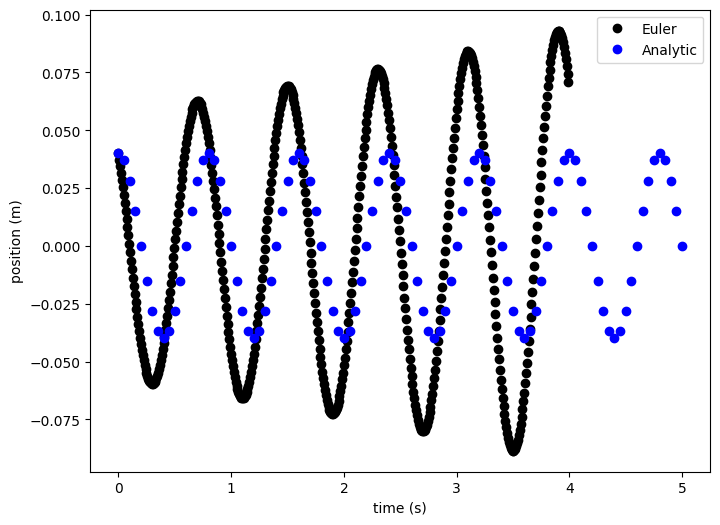

In [122]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 =0.04
vx0 = -0.32

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.04
m = 0.15
k = 9.25

# Enter the period you determined from Part 1
T = 0.8
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T


# call initialize
t1,x1,v1 = initialize(x0,vx0,tmax,dt)


# call calculate
t1,x1,v1 = calculate(t1,x1,v1,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(t1,x1,"ko",label="Euler")



# overplot your analytic solution from Part 1
plt.plot(t,x,"bo",label="Analytic")
plt.xlabel("time (s)")
plt.ylabel("position (m)")

plt.legend()

### Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions.
1. (2 points) Does your Euler solution conserve energy? Explain.  
1. (2 points) Is the Euler method a good approach for modeling oscillatory motion? Explain.

Text(0, 0.5, 'Energy (J)')

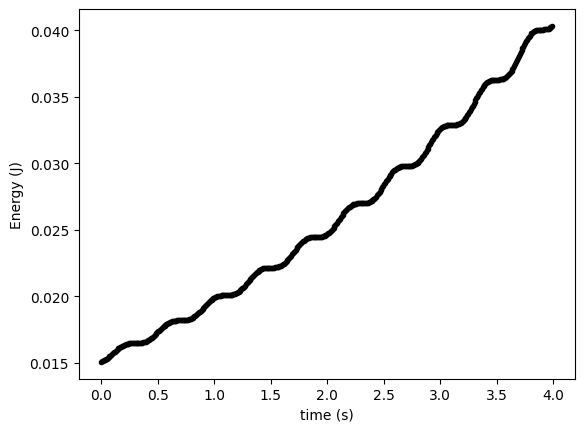

In [112]:
# Your plot of energy vs time here
E = 0.5*m*v1**2+0.5*k*x1**2
plt.plot(t1,E,"k.")
plt.xlabel("time (s)")
plt.ylabel("Energy (J)")

# Euler method is not a great approach. Total energy should not increase over time (not conserving).

# Part 3 - Model Motion with the Euler-Cromer Method

* Copy your calculate function below, but call it `euler_cromer_calculate`
* (5 points) Adjust the code so that:
  * you calculate $v_{i}$ before  $x_{i}$
  * you use $v_{i}$ instead of $v_{i-1}$ when calculating $x_{i}$.
* (5 points) Replot the position vs time.
* (5 points) Replot total energy vs time.


**Questions**

Briefly answer the following questions.
1. (2 points) What is different about the Euler vs Euler-Cromer method?  Which is better to use when modeling simple harmonic motion?
1. (2 points) Does the Euler-Cromer solution conserve energy? Justify your answer.

In [131]:
# your euler_cromer_calculate

def euler_cromer_calculate(t,x,v,k,m,dt):
  """
  description:
  fill empty arrays (t,x,v) with revised values
  parameters:
  time (t), position (x), velocity (v), spring constant (k), mass (m), dt
  return:
  time (t), position (x), velocity (v)
  """
  for i in range(1,len(t)):
    t[i] = t[i-1]+dt
    v[i] = v[i-1]-acceleration(k,m,x[i-1])*dt
    x[i] = x[i-1]+v[i]*dt-0.5*acceleration(k,m,x[i-1])*dt**2
  return t,x,v

Text(0, 0.5, 'position (m)')

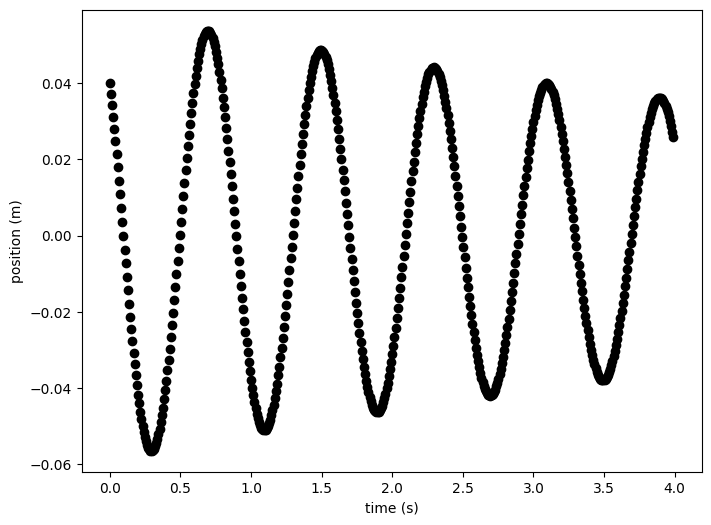

In [134]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate

# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 =0.04
vx0 = -0.32

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.04
m = 0.15
k = 9.25

# Enter the period you determined from Part 1
T = 0.8
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T


# call initialize
t2,x2,v2 = initialize(x0,vx0,tmax,dt)


# call calculate
t2,x2,v2 = euler_cromer_calculate(t2,x2,v2,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(t2,x2,"ko")
plt.xlabel("time (s)")
plt.ylabel("position (m)")

Text(0, 0.5, 'Energy (J)')

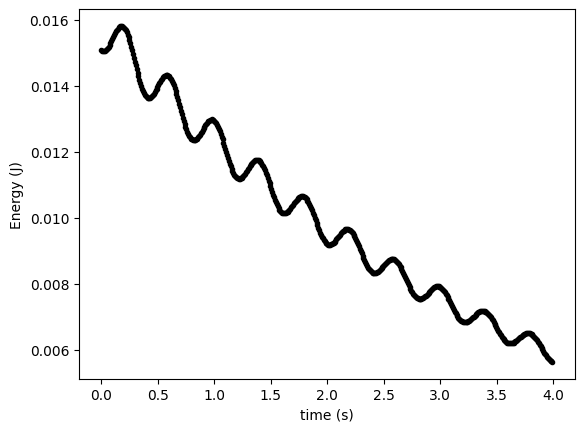

In [135]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here

# Your plot of energy vs time here
E = 0.5*m*v2**2+0.5*k*x2**2
plt.plot(t2,E,"k.")
plt.xlabel("time (s)")
plt.ylabel("Energy (J)")

In [ ]:
'''
The Euler one amplifies the oscillation, the Euler-Cromer one dampens the oscillation.
It does represent the oscillation because the position of the mass should return to zero over time.
'''

### Plot Speed vs Position

(5 points)

* Make a plot of $v_x$ versus $x$.
  * Use the scatter command, and color code your points by the time
  ```python
  plt.scatter(x, vx, c=time)
  ```
* Interpret your results. What does the graph of velocity vs. position show?

# Bonus

(5 points)

Adapt your Euler-Cromer method to include a damping force with the form:

$$F_{damping} = - b v_x$$


Test different values of $q$ to reproduce Figure 3.4 in the text.


Text(0, 0.5, 'velocity (m/s)')

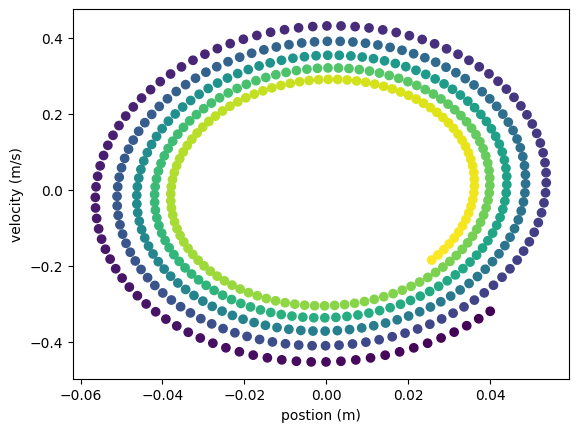

In [141]:
plt.scatter(x2,v2,c=t2)
plt.xlabel("postion (m)")
plt.ylabel("velocity (m/s)")

# this plot shows how the mass loses speed over time while going back to initial position

In [152]:
def accel_damp(k,m,b,x,v):
  """
  description:
  calculates acceleration of the mass with dampening force
  parameters:
  spring constant (k), mass (m), position (x)
  return:
  acceleration (a)

  """
  # your code here
  a = k*x/m+b*v/m
  return a

In [161]:

def euler_cromer_calculate_damp(t,x,v,k,m,dt):
  """
  description:
  fill empty arrays (t,x,v) with revised values for dampened
  parameters:
  time (t), position (x), velocity (v), spring constant (k), mass (m), dt
  return:
  time (t), position (x), velocity (v)
  """
  for i in range(1,len(t)):
    t[i] = t[i-1]+dt
    v[i] = v[i-1]-accel_damp(k,m,b,x[i-1],v[i-1])*dt
    x[i] = x[i-1]+v[i]*dt-0.5*accel_damp(k,m,b,x[i-1],v[i-1])*dt**2
  return t,x,v

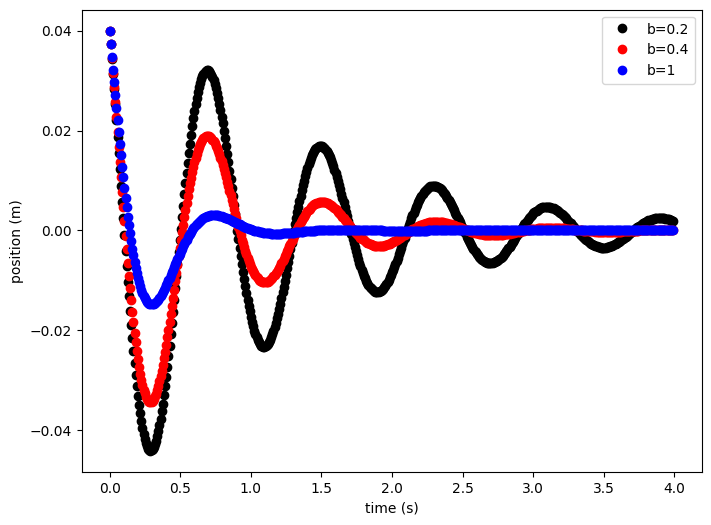

In [160]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 =0.04
vx0 = -0.32

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.04
m = 0.15
k = 9.25

# Enter the period you determined from Part 1
T = 0.8
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T
b = 0.2

# call initialize
t3,x3,v3 = initialize(x0,vx0,tmax,dt)


# call calculate
t3,x3,v3 = euler_cromer_calculate_damp(t3,x3,v3,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(t3,x3,"ko",label="b=0.2")
plt.xlabel("time (s)")
plt.ylabel("position (m)")

b = 0.4

# call initialize
t3,x3,v3 = initialize(x0,vx0,tmax,dt)


# call calculate
t3,x3,v3 = euler_cromer_calculate_damp(t3,x3,v3,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.plot(t3,x3,"ro",label="b=0.4")
plt.xlabel("time (s)")
plt.ylabel("position (m)")

b = 1

# call initialize
t3,x3,v3 = initialize(x0,vx0,tmax,dt)


# call calculate
t3,x3,v3 = euler_cromer_calculate_damp(t3,x3,v3,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.plot(t3,x3,"bo",label="b=1")
plt.xlabel("time (s)")
plt.ylabel("position (m)")

plt.legend()